# Overview


Then, the class itself. We kick things off with my short (and hilarous) intro to today, then cover a few more  administrative things. 

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend watching and paying attention!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

## The Informal Intro

Ok. In the video below I discuss

 * How it's going with COVID-19
 * Some background and context on what we'll be learning about in class today
 * Where we are with the admin stuff (how to take the class)
 * **An overview of the rest of the semester**. This last part is especially important for you to know about.

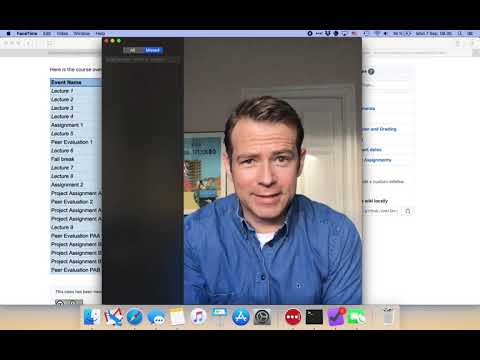

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("XkDtCQOx8Xk",width=800, height=450)

# Part 0: The Admin Stuff 
### (GitHub Page Overview Edition)

Last week, I gave you a lot of practical information about how to follow the class. 

In addition to a lot of (boring) information about COVID and my unusual precautions, I discussed the principles of how I teach. 
How each lecture is structured to maximize your learning according to state-of-the-art principles. 

This week, the admin video talks about the structure of the Course Page, which actually contains a lot of useful information. 

You'll notice that I've made it for the class that runs in the fall (Social Graphs and Interactions), but the web-page struture is similar, so everyhting should still work.

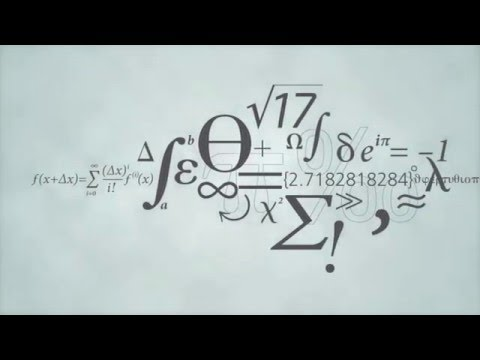

In [2]:
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

Next week, I'll talk about the final elements of admin we have to cover for now

* Forming groups
* Handing in assignments
* Peer Evaluations
* The structure of the class

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

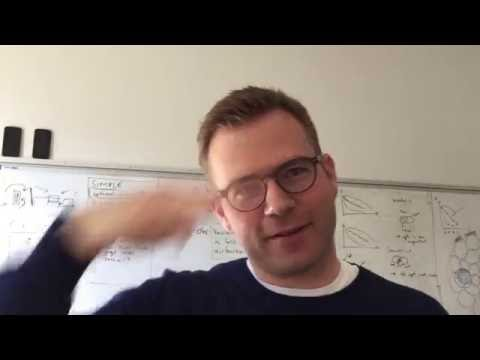

In [3]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.

---
* Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?

For example, Facebook built a network which has huge amount of connections, even though $L$ is still less than $L_{max}$ (denote the complete network case).

---

> There are more questions on Chapter 2 below.

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book using `NetworkX`:

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import pandas as pd

from networkx.algorithms import bipartite

from IPython.display import Image

%matplotlib inline

> *Exercises*:
> 
> #### Go to NS Section 2.12: Homework, then:
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 

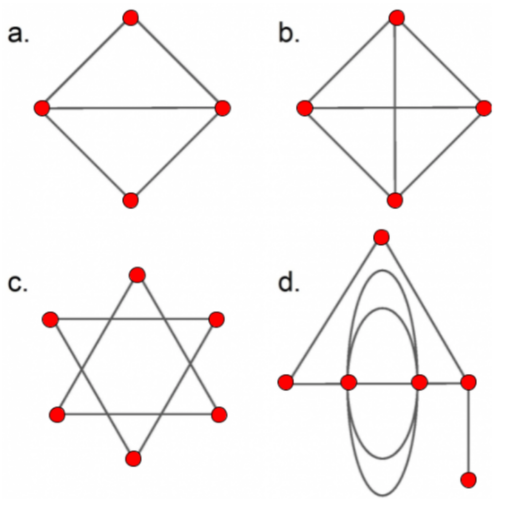

In [5]:
Image('ex2_1.png', width=400, height=600)

A graph has an Euler path if and only if there are at most two nodes with odd degree. Using this principle for the graphs, we can know:  
* __a.__ 2 nodes have odd degree: It has Euler path  
* __b.__ 4 nodes have odd degree: It does not have Euler path  
* __c.__ 0 nodes have odd degree: It has Euler path  
* __d.__ 2 nodes have odd degree: It has Euler path 

>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).

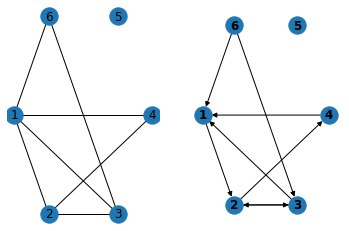

In [6]:
G1 = nx.Graph()

## undirected graph of 6 nodes and 7 links. 
G1.add_nodes_from(list(range(1,7))) # add nodes from any iterable list 
E1 = [(1,2),(1,3),(1,4),(1,6),(2,3),(3,6),(2,4)]
G1.add_edges_from(E1)

## Directed graph of 6 nodes and 8 directed links 

G2 = nx.DiGraph()
G2.add_nodes_from(list(range(1,7)))
E2 = [(1,2),(2,3),(2,4),(3,2),(3,1),(4,1),(6,3),(6,1)]
G2.add_edges_from(E2)

plt.subplot(121)
nx.draw_shell(G1, with_labels = True)
plt.subplot(122)
nx.draw_shell(G2, with_labels = True, font_weight = 'bold')
plt.show()

* __a.__ The corresponding adjacency matrices:

#### I. For undirected graph:

In [7]:
adj_matrix_G1 =  nx.adjacency_matrix(G1).toarray()
adj_matrix_G1 = pd.DataFrame(adj_matrix_G1, columns=[1,2,3,4,5,6], index=[1,2,3,4,5,6])
print('Undirected:')
print(adj_matrix_G1)

Undirected:
   1  2  3  4  5  6
1  0  1  1  1  0  1
2  1  0  1  1  0  0
3  1  1  0  0  0  1
4  1  1  0  0  0  0
5  0  0  0  0  0  0
6  1  0  1  0  0  0


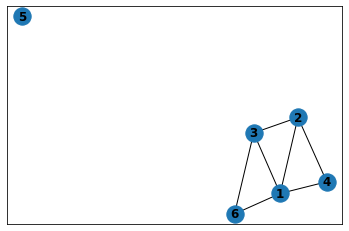

In [8]:
plot_G1 = nx.draw_networkx(G1, font_weight = 'bold')

#### II. For directed graph:

In [9]:
adj_matrix_G2 = nx.adjacency_matrix(G2).toarray()
adj_matrix_G2 = pd.DataFrame(adj_matrix_G2, columns=[1,2,3,4,5,6], index=[1,2,3,4,5,6])
print('Directed:')
print(adj_matrix_G2)

Directed:
   1  2  3  4  5  6
1  0  1  0  0  0  0
2  0  0  1  1  0  0
3  1  1  0  0  0  0
4  1  0  0  0  0  0
5  0  0  0  0  0  0
6  1  0  1  0  0  0


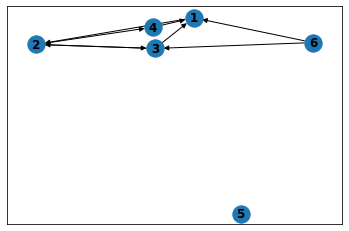

In [10]:
plot_G2 = nx.draw_networkx(G2, font_weight = 'bold')

* **b.** The corresponding link lists

In [11]:
print('Undirected:', list(G1.edges))
print('Directed:', list(G2.edges))

Undirected: [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
Directed: [(1, 2), (2, 3), (2, 4), (3, 2), (3, 1), (4, 1), (6, 3), (6, 1)]


* **c.** The average clustering coefficient

In [12]:
c_avg_G1 = nx.average_clustering(G1)
print('Average clustering coefficient: ', c_avg_G1)

Average clustering coefficient:  0.6388888888888888


* **d.** In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

According to the __Box 2.4__ in book, we know the number shortest paths can be computed using adjacency matrix:

In [13]:
undirected_path_node1_3 = (np.mat(adj_matrix_G1)**3)[0,2]
directed_path_node1_3 = (np.mat(adj_matrix_G2)**3)[0,2]
print('Undirected-Number of paths from node 1 to 3 with length 3: ', undirected_path_node1_3)
print('Directed-Number of paths from node 1 to 3 with length 3: ', directed_path_node1_3)

Undirected-Number of paths from node 1 to 3 with length 3:  7
Directed-Number of paths from node 1 to 3 with length 3:  0


* **e.** Consider an undirected network of size N in which each node has degree k = 1. Which condition does N have to satisfy? What is the degree distribution of this network? How many components does the network have?  

N = 2  
Degree distribution is 1 since $p_k = \frac{N_k}{N}$  
Components = 1

* **f.** Consider now a network in which each node has degree k = 2 and clustering coefficient C = 1. How does the network look like? What condition does N satisfy in this case?

The network might look like a cycle when N is large enough 

N >= 3 (since k=2)

>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks).  *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipatite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).
> 

In [14]:
BG = nx.Graph()
BG.add_nodes_from([1, 2, 3, 4, 5, 6], bipartite=0)
BG.add_nodes_from([7, 8, 9, 10, 11], bipartite=1)
BG.add_edges_from([(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 9), (5, 11), (6, 11)])

In [15]:
# Create two sets of top nodes and bottom nodes
top_nodes_BG, bottom_nodes_BG = bipartite.sets(BG)

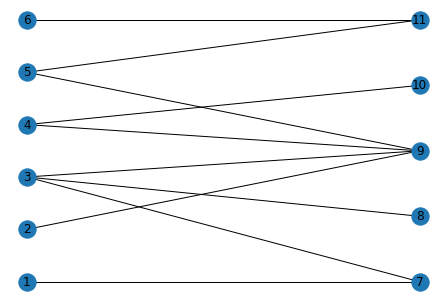

In [16]:
nx.draw(BG, pos = nx.bipartite_layout(BG, top_nodes_BG), with_labels=True)

In [17]:
adj_BG = pd.DataFrame(nx.adjacency_matrix(BG).toarray(), 
                      columns=[1,2,3,4,5,6,7,8,9,10,11],
                      index=[1,2,3,4,5,6,7,8,9,10,11]) 
adj_BG

,1,2,3,4,5,6,7,8,9,10,11
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,1,1,0,0
4,0,0,0,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,1
7,1,0,1,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0
9,0,1,1,1,1,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0


It is a block-diagonal matrix because all nonzero elements in the matrix are contained in square blocks along the matrix’ diagonal and all other elements are zero.

* **b.** Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

In [18]:
top_projected_graph = bipartite.projected_graph(BG, top_nodes_BG)
bottom_projected_graph = bipartite.projected_graph(BG, bottom_nodes_BG)

In [19]:
adj_top_BG = pd.DataFrame(nx.adjacency_matrix(top_projected_graph).toarray(), 
                          columns=[1,2,3,4,5,6], 
                          index=[1,2,3,4,5,6])
adj_top_BG

,1,2,3,4,5,6
1,0,0,1,0,0,0
2,0,0,1,1,1,0
3,1,1,0,1,1,0
4,0,1,1,0,1,0
5,0,1,1,1,0,1
6,0,0,0,0,1,0


In [20]:
adj_bottom_BG = pd.DataFrame(nx.adjacency_matrix(bottom_projected_graph).toarray(),
                             columns=[7,8,9,10,11],
                             index=[7,8,9,10,11])
adj_bottom_BG

,7,8,9,10,11
7,0,1,1,0,0
8,1,0,1,0,0
9,1,1,0,1,1
10,0,0,1,0,0
11,0,0,1,0,0


* **c.** Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

In [21]:
avg_degree_top = sum(dict(BG.degree(top_nodes_BG)).values())/len(top_nodes_BG)
avg_degree_bottom = sum(dict(BG.degree(bottom_nodes_BG)).values())/len(bottom_nodes_BG)
print('Average degree of the purple(top) nodes is: ', avg_degree_top)
print('Average degree of the green(bottom) nodes is: ', avg_degree_bottom)

Average degree of the purple(top) nodes is:  1.6666666666666667
Average degree of the green(bottom) nodes is:  2.0


* **d.** Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?

In [22]:
projected_avg_degree_top = sum(dict(top_projected_graph.degree()).values())/len(top_projected_graph)
projected_avg_degree_bottom = sum(dict(bottom_projected_graph.degree()).values())/len(bottom_projected_graph)
print('Average degree of the purple(top) nodes in network projection is: ', projected_avg_degree_top)
print('Average degree of the green(bottom) nodes in net work projection is: ', projected_avg_degree_bottom)

Average degree of the purple(top) nodes in network projection is:  2.6666666666666665
Average degree of the green(bottom) nodes in net work projection is:  2.0


It's not surprising since projection of the original network can a create totally different network.

---

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

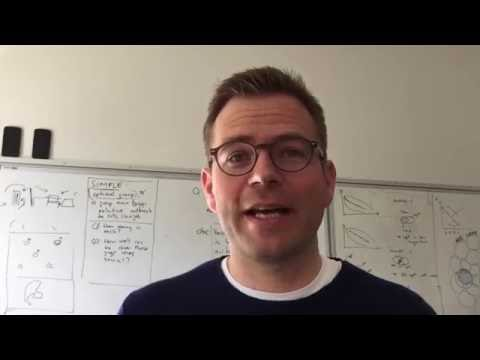

In [23]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450)

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.

---

> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
>
> #### Binning real numbers:
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [24]:
mu, sigma = 2, 0.125
random_normal = np.random.normal(mu, sigma, size = 5000)

>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

In [25]:
hist_normal, bin_edges_normal = np.histogram(random_normal, bins = 10)
print('The count of elements in each bin (hist):\n{}\n'.format(hist_normal))
print('Intervals of numbers (bin_edges):\n', bin_edges_normal)

print('\nLength of hist:', len(hist_normal))
print('Length of bin_edges:', len(bin_edges_normal))

The count of elements in each bin (hist):
[  11   74  362  893 1498 1288  649  184   38    3]

Intervals of numbers (bin_edges):
 [1.54058987 1.63693471 1.73327956 1.8296244  1.92596924 2.02231409
 2.11865893 2.21500377 2.31134862 2.40769346 2.5040383 ]

Length of hist: 10
Length of bin_edges: 11


>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

Bin edges represents the boundary of each range, hence the amount of bin edges will always be 1 more than the amount of bar groups. In order to plot them together, we can insert the very first count value into the original bar group, then the first bar which is located in between the first and the second range point would be included as well.

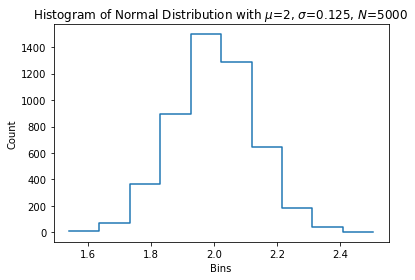

In [26]:
plt.plot(bin_edges_normal, np.insert(hist_normal, 0, hist_normal[0]), drawstyle = 'steps')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Histogram of Normal Distribution with $\mu$=2, $\sigma$=0.125, $N$=5000')
plt.show()

> #### Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out, `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 

In [27]:
lam, size = 10, 5000
random_poisson = np.random.poisson(lam=lam, size=size)
print('Max value: {}\nMin value: {}'.format(random_poisson.max(), random_poisson.min()))

Max value: 23
Min value: 1


>   * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [28]:
v = np.unique(random_poisson).tolist()
v.append(v[-1]+1)

In [29]:
hist_poisson, bin_edges_poisson = np.histogram(random_poisson, bins=v)

In [30]:
counts = []
for i in v[:-1]:
    # Calculate the frequency that each bin occurs
    c = sum(random_poisson==i)
    counts.append(c)
print('Sum over bin counts (manual count):')
print(counts)

Sum over bin counts (manual count):
[4, 16, 48, 98, 167, 309, 447, 577, 652, 618, 563, 446, 391, 269, 168, 95, 68, 38, 15, 6, 2, 1, 2]


Since `np.histogram` treats bins input as bin edge values, which means that, in order to obtain the right frequency distribution of the bins, we need to define the binning vector so that the first and last bin wanted do not end up being edges. It is discovered after experimentations that by adding an extra value after the maximum bin value element in the binning vector, the np.histogram will ouput the right distribution ready to be plotted. Therefore, the first element of the binning vector $v$ is equal to the minimum value of the poisson distribution but the last element of the binning vector is 1 larger than the maximum value of the poisson distribution.

Note: _It will also work by adding extra element before the minimum bin value and after the maximum bin value, however that gave the exact same result as just by adding an extra element after the maximum bin value._    

In [31]:
print('First element of binning vector: {}, min value from Poisson distribution: {}'.format(v[0], random_poisson.min()))
print('Last element of binning vector: {}, max value from Poisson distribution: {}'.format(v[-1], random_poisson.max()))

First element of binning vector: 1, min value from Poisson distribution: 1
Last element of binning vector: 24, max value from Poisson distribution: 23


>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 

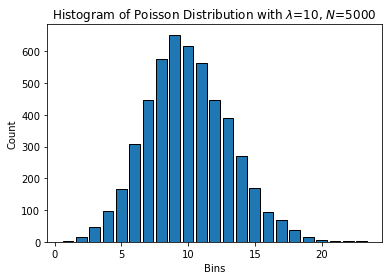

In [32]:
plt.bar(bin_edges_poisson[:-1], hist_poisson, edgecolor='black')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Histogram of Poisson Distribution with $\lambda$=10, $N$=5000')
plt.show()

> #### Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.

$\because \lambda$ corresponds to <$k$\> (average degree), and  <$k$\> $ = p(N-1)$  
$\therefore  p = \frac{<k>}{N-1} $

In [33]:
N = 5000
k = 10
p = k/(N-1)

>   * Now, use `networkx` to create the graph and extract the degree distribution.

In [34]:
ER_G = nx.generators.random_graphs.erdos_renyi_graph(n=N, p=p)

>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [35]:
# Extract the value of degree
ER_G_degree = [v for k, v in ER_G.degree()]

# Create binning vector
v = np.unique(ER_G_degree).tolist()
v.append(v[-1]+1)

# Generate the histogram
hist_ER, bin_edges_ER = np.histogram(ER_G_degree, bins=v)

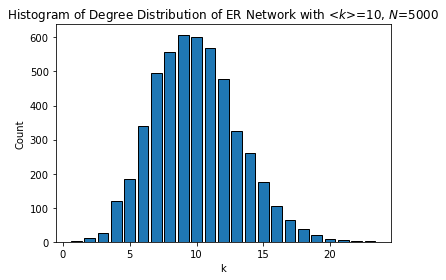

In [36]:
plt.bar(bin_edges_ER[:-1], hist_ER, edgecolor='black')
plt.xlabel('k')
plt.ylabel('Count')
plt.title('Histogram of Degree Distribution of ER Network with <$k$>=10, $N$=5000')
plt.show()

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

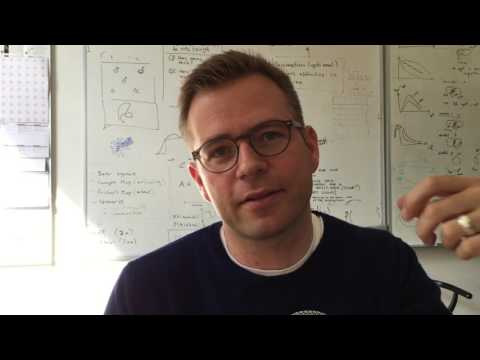

In [37]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450)

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


---
> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

Consider an Erdős-Rényi network with $N$ = 3000 nodes, connected to each other with probability $p = 10^{-3}$.

* __a. What is the expected number of links, <$L$\>?__

> <$L$\> = $\frac{pN(N-1)}{2}$
       = 4498.5

* __b. In which regime is the network?__

> $\because p > \frac{1}{N}$ and $p \leq \frac{lnN}{N}$：  
  $\therefore$ The network is in supercritical regime

* __c. Calculate the probability $p_c$ so that the network is at the critical point.__

> $\because$ When the network is at the critical point, <$k$\> = 1  
  Also <$k$\> = $p(N-1)$  
  $\therefore p_c= \frac{<k>}{N-1} = \frac{1}{3000-1} \approx 0.000333444$

* __d. Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.__

> $\because$ The network has only one component means that all the nodes are linked  
  $\therefore$ The network is in connected regime, and $p > \frac{ln(N)}{N-1}$   
  Solving for the inequality (in Maple) we obtain $0 < N^{cr} < 1$ or $N^{cr} > 9119$

* __e. For the network in (d), calculate the average degree <$k^{cr}$\> and the average distance between two randomly chosen nodes <$d$\>.__

> $\because$ In (d), the range of $N$ is: $0 < N^{cr} < 1$ or $N^{cr} > 9119$  
> $\therefore$ We will choose $N=9120$ (which is the lowest integer that satisfies the inequality) for computing average degree and average distance

In [38]:
N = 9120
p = 10**(-3)
k_cr = p*(N-1)
d = np.log(N)/np.log(k_cr)
print('Average degree k:\n{}\n\nAverage distance <d>:\n{}'.format(k_cr, d))

Average degree k:
9.119

Average distance <d>:
4.12522144293705


* __f. Calculate the degree distribution $p^k$ of this network (approximate with a Poisson degree distribution).__

> Using Poisson distribution to approximate the degree distribution, we know:  
$p_{k}=e^{-\langle k\rangle}\frac{\langle k\rangle^{k}}{k !}$,  <$k$> = 9.119 (N=9120)

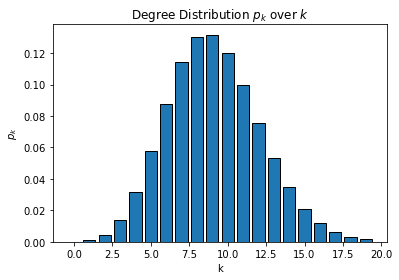

In [39]:
# Average degree is around 9, choose (0, 20) to expect a somewhat symmetric Poisson distribution
k_list = range(0, 20)

# Calculate probability of Poisson distribution
p_k = [math.exp(-k_cr)*(k_cr**k)/math.factorial(k) for k in k_list]
plt.bar(k_list, p_k, edgecolor='black')
plt.xlabel('k')
plt.ylabel('$p_k$')
plt.title('Degree Distribution $p_k$ over $k$')
plt.show()

> #### Paths. 
>   * Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

In [40]:
# Number of nodes
N = 200
# Average degree
k = 1.5

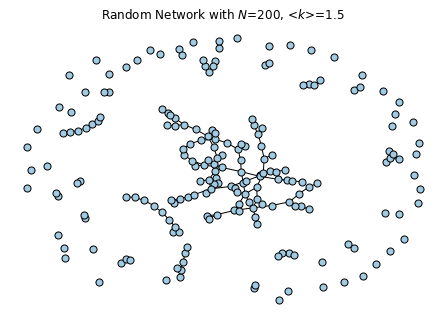

In [41]:
G = nx.generators.random_graphs.erdos_renyi_graph(n = N, p = k/(N - 1))
nx.draw(G, node_size = 50, node_color = '#A0CBE2', edgecolors = 'black')
plt.title('Random Network with $N$=200, <$k$>=1.5')
plt.show()

* Extract the Giant Connected Component, GCC.

>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)

In [42]:
# Largest component
largest_cc = max(nx.connected_components(G), key=len)
GCC = G.subgraph(largest_cc).copy()

>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)

In [43]:
source = random.choice(list(GCC.nodes))

>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)

In [44]:
dist = nx.single_source_shortest_path_length(GCC, source=source, cutoff=2) 

>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

In [45]:
colornode = []
for (k, d) in dist.items():
    if d == 2:
        colornode.append(k)

In [46]:
color_map = []
for node in GCC:
    if node == source:
        color_map.append('#000000')
    elif node in colornode: 
        color_map.append('#ff0000')    
    else:
        color_map.append('#A0CBE2')

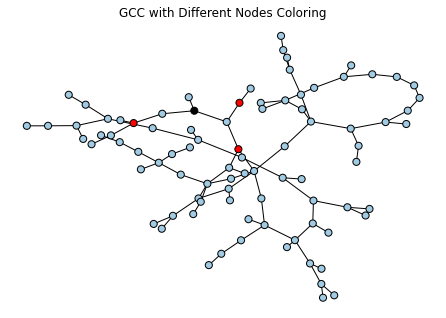

In [47]:
nx.draw(GCC, node_size = 50, node_color = color_map, edgecolors = 'black')
plt.title('GCC with Different Nodes Coloring')
plt.show()